In [10]:
from bioblue.nb import *

from pathlib import Path
import pandas as pd
from bioblue.plot import cm
import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize_config_module as init_hydra, compose
from omegaconf import OmegaConf
import mlflow
import time
import cv2
from ipywidgets import interact, interactive
import yaml
import os
from PIL import Image

In [12]:
import imageio

def multiple_vol_slicer(volumes, segs, gt_segs, titles):
    def _vol_slicer(axis=0, i=0):
        fig, axs = plt.subplots(ncols=len(volumes), figsize=(len(volumes)*15,30), squeeze=False)
        for ax, volume, seg, gt_seg, title in zip(axs[0], volumes, segs, gt_segs, titles):
            ax.imshow(np.take(volume, i, axis), cmap="gray")
            ax.imshow(np.take(seg, i, axis), cmap=cm.vessel, alpha=0.5)
            ax.imshow(np.take(gt_seg, i, axis), cmap=cm.rb, alpha=0.25)
            ax.set_title(title)
        plt.show()
        plt.close(fig)
    return interactive(_vol_slicer, axis=widgets.IntSlider(2,0,2), i=widgets.IntSlider(0,0,volumes[0].shape[0]-1,continuous_update=False))

def multiple_vol_slicer_noseg(volumes):
    def _vol_slicer(axis=0, i=0):
        fig, axs = plt.subplots(ncols=len(volumes), figsize=(len(volumes)*15,30), squeeze=False)
        for ax, volume in zip(axs[0], volumes):
            ax.imshow(np.take(volume, i, axis), cmap="gray")
            plt.show()
        plt.close(fig)
    return interactive(_vol_slicer, axis=widgets.IntSlider(2,0,2), i=widgets.IntSlider(0,0,volumes[0].shape[0]-1,continuous_update=False))

def multiple_vol_saver(name, volumes, segs, gt_segs, titles, axis=2):
    images = []
    for i in range(volumes[0].shape[axis]):
        fig, axs = plt.subplots(ncols=len(volumes), figsize=(len(volumes)*10,10), squeeze=False)
        for ax, volume, seg, gt_seg, title in zip(axs[0], volumes, segs, gt_segs, titles):
            ax.imshow(np.take(volume, i, axis), cmap="gray")
            ax.imshow(np.take(seg, i, axis), cmap=cm.vessel, alpha=0.5)
            ax.imshow(np.take(gt_seg, i, axis), cmap=cm.rb, alpha=0.25)
            ax.set_title(title)
        # plt.show()
        fig.canvas.draw()
        img = Image.frombytes('RGB', fig.canvas.get_width_height(),fig.canvas.tostring_rgb())
        images.append(img)
        plt.close(fig)
    images[0].save(name, save_all=True, append_images=images[1:], duration=50, loop=0)


def volume_slicer(volume, seg):
    def _vol_slicer(axis=0, i=0):
        fig, ax = plt.subplots(figsize=(10,10))
        ax.imshow(np.take(volume, i, axis), cmap="gray")
        ax.imshow(np.take(seg, i, axis), cmap=cm.vessel, alpha=0.5)
        plt.show()
        plt.close(fig)
    return interactive(_vol_slicer, axis=widgets.IntSlider(2,0,2), i=widgets.IntSlider(0,0,volume.shape[0]-1,continuous_update=False))
    

def volume_writer(volume, seg, axis=1, dirname="tmpimg", name="volume.gif"):
    dirname = Path(dirname)
    dirname.mkdir()
    filenames = []
    for i in tqdm(range(volume.shape[0]-1)):
        fig, ax = plt.subplots(figsize=(10,10))
        ax.imshow(np.take(volume, i, axis), cmap="gray")
        ax.imshow(np.take(seg, i, axis), cmap=cm.vessel, alpha=0.5)
        filenames.append(dirname / f"{i}.png")
        plt.savefig(dirname / f"{i}.png", bbox_inches="tight")
        plt.close()
    with imageio.get_writer(name, mode='I') as writer:
        for filename in tqdm(filenames):
            image = imageio.imread(filename)
            writer.append_data(image)
            filename.unlink()
    dirname.rmdir()

In [3]:
all_run_paths = sorted(Path("../outputs/2022-03-30/").iterdir(), reverse=False)
run_paths_widget = widgets.SelectMultiple(options=all_run_paths, value=all_run_paths)
display(run_paths_widget)

SelectMultiple(index=(0, 1), options=(PosixPath('../outputs/2022-03-30/14-39-00'), PosixPath('../outputs/2022-…

In [6]:
run_paths = run_paths_widget.value
image_paths = []
config_paths = []
configs = []
ds_confs = []
names = []
for run_path in sorted(run_paths):
    image_paths.append(run_path / "images/volumes")
    config_path = run_path / ".hydra/config.yaml"

    config = OmegaConf.load(config_path)
    ds_conf = config.dataset  # OmegaConf.to_container(config.dataset, resolve=True)
    ds_confs.append(config.dataset)
    configs.append(config)
    names.append(f"{run_path.parent.stem}/{run_path.stem}")


s1_4_0-1135_1024_1344_832
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1088_1408_704
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1088_1472_576
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1152_1280_512
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1152_1280_960
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1152_1536_512
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1152_1664_960
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1216_1088_960
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1280_1152_960
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1408_1344_704
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_1408_1344_832
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

s1_4_0-1135_192_1152_256
2022-03-30/14-39-00


interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

KeyboardInterrupt: 

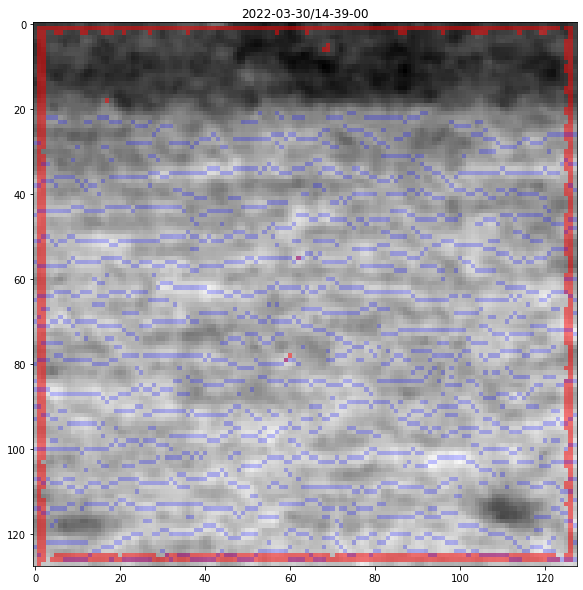

In [13]:
all_samples = defaultdict(list)
# names = ["scale=4","scale=8", "scale=10"]
for image_path in image_paths:
    image_epoch = sorted(image_path.glob("epoch2"))[-1]
    samples = sorted(image_epoch.iterdir())
    for sample in samples:
        all_samples[sample.stem].append(sample)

for i, (sample_name, samples) in enumerate(list(all_samples.items())):
    print(sample_name)
    slicers = []
    images = []
    pred_segs = []
    gt_segs = []
    for name, sample in zip(names, samples):
        print(name)
        bg_image_path = (
            Path(ds_conf.data_dir)
            / ds_conf.dataset_name
            / "val"
            / "image"
            / f"{sample.name}.npz"
        )
        seg_path = (
            Path(ds_conf.data_dir)
            / ds_conf.dataset_name
            / "val"
            / "segmentation"
            / f"{sample.name}.npz"
        )
        image = np.load(bg_image_path)['arr_0']
        gt_seg = np.load(seg_path)['arr_0']
        pred_seg = np.empty_like(gt_seg)
        for mask_path in sorted(sample.iterdir()):
            mask = cv2.imread(str(mask_path), cv2.IMREAD_UNCHANGED)
            idx = int(mask_path.stem)
            pred_seg[:,:,idx] = mask
        pred_seg[pred_seg==2] = 0
        gt_seg[gt_seg==2] = 0
        images.append(image)
        pred_segs.append(pred_seg)
        gt_segs.append(gt_seg)
    display(multiple_vol_slicer(images, pred_segs, gt_segs, names))
    gif_dir = Path("gifs2")
    gif_dir.mkdir(exist_ok=True)
    multiple_vol_saver(gif_dir / (sample_name + ".gif"), images, pred_segs, gt_segs, names)
    # display(multiple_vol_slicer_noseg(images))
    if i>10:
        break

In [33]:
# fig = plt.figure(figsize=(10,10))
# plt.imshow(image[:,:,56])
# plt.imshow(pred_seg[:,:,56]==1, cmap=cm.vessel, alpha=0.65)
# plt.show()
pred_seg[pred_seg==2] = 0
volume_slicer(image, pred_seg) # , axis=2, name="volume_2.gif")
view(pred_seg)

interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [6]:
from skimage.measure import label
from skimage.morphology import area_opening, binary_opening, disk, ball, octahedron, diameter_opening, skeletonize, binary_erosion

# pred_seg_pp = binary_erosion(pred_seg).astype(float)
pred_seg_pp = binary_opening(pred_seg, octahedron(1)).astype(float)
volume_slicer(image, pred_seg_pp)
view(pred_seg_pp)

interactive(children=(IntSlider(value=2, description='axis', max=2), IntSlider(value=0, continuous_update=Fals…

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [7]:
view(pred_seg_pp[:,:16,:16])

l = label(pred_seg_pp[:,:16,:16], connectivity=1)
sorted(np.unique(l, return_counts=True)[-1], reverse=True)
view(l)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [8]:
l = label(pred_seg_pp, connectivity=2)
sorted(np.unique(l, return_counts=True)[-1], reverse=True)
view(l)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…